**LOADING THE DATA**

In [1]:
! unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: indian_liver_patient.csv  


**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

**READING THE DATASET**

In [3]:
df = pd.read_csv("/content/indian_liver_patient.csv")


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [4]:
df = df.drop_duplicates()

In [ ]:
df.shape

(570, 11)

In [ ]:
df.value_counts('Dataset')

,count
Dataset,
1,406
2,164


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


**CHECKING NULL VALUES**

In [5]:
df.isnull().any()

,0
Age,False
Gender,False
Total_Bilirubin,False
Direct_Bilirubin,False
Alkaline_Phosphotase,False
Alamine_Aminotransferase,False
Aspartate_Aminotransferase,False
Total_Protiens,False
Albumin,False
Albumin_and_Globulin_Ratio,True


**HANDLING NULL VALUES**

In [6]:
mode_value = df['Albumin_and_Globulin_Ratio'].mode()[0]
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(mode_value)

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


**DATA VISUALIZATION**

UNIVARIATE

No of Males:  430
No of Females:  140


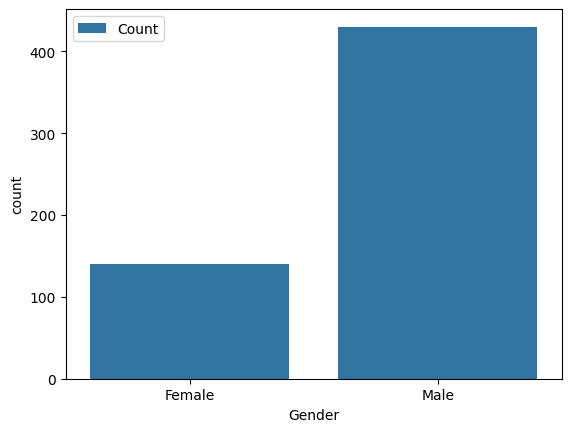

In [ ]:
sns.countplot(data= df, x = 'Gender',label = 'Count')
m,f = df['Gender'].value_counts()
print("No of Males: ",m)
print("No of Females: ",f)

liver disease patients:  406
Non-liver disease patients:  164


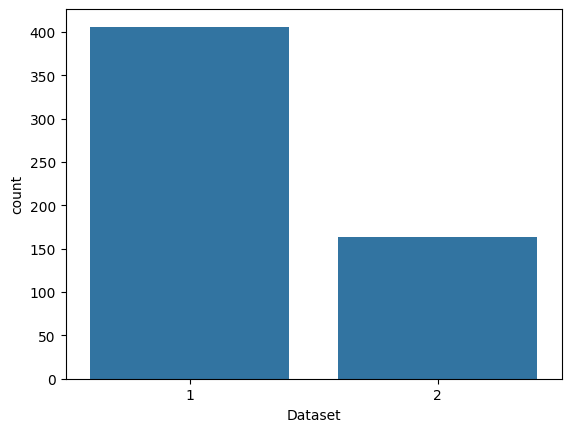

In [ ]:
sns.countplot(data= df, x= 'Dataset')
LD,NLD = df['Dataset'].value_counts()
print("liver disease patients: ",LD)
print("Non-liver disease patients: ",NLD)

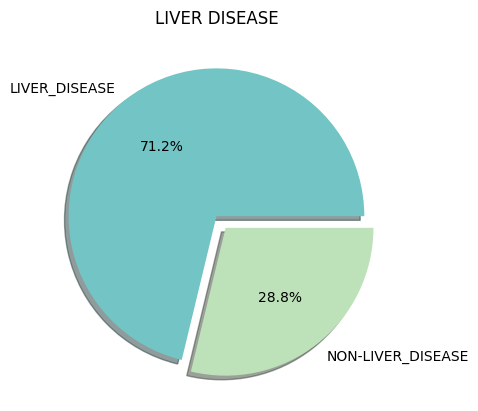

In [ ]:
plt.pie(df['Dataset'].value_counts(),[0,0.1],labels=['LIVER_DISEASE','NON-LIVER_DISEASE'],autopct ="%1.1f%%",shadow = True,colors = ['#73C5C5','#BDE2B9'])
plt.title("LIVER DISEASE")
plt.show()

BIVARIATE

<ipython-input-16-8358671e33fd>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Albumin_and_Globulin_Ratio'], y = df['Dataset'],palette = 'Set2',data = df)


<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Dataset'>

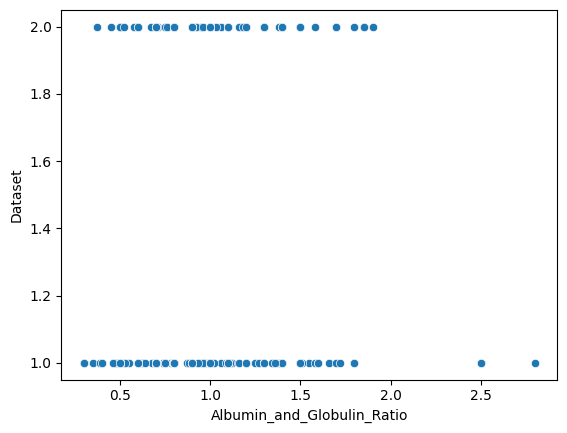

In [ ]:
sns.scatterplot(x = df['Albumin_and_Globulin_Ratio'], y = df['Dataset'],palette = 'Set2',data = df)

MULTI-VARIATE

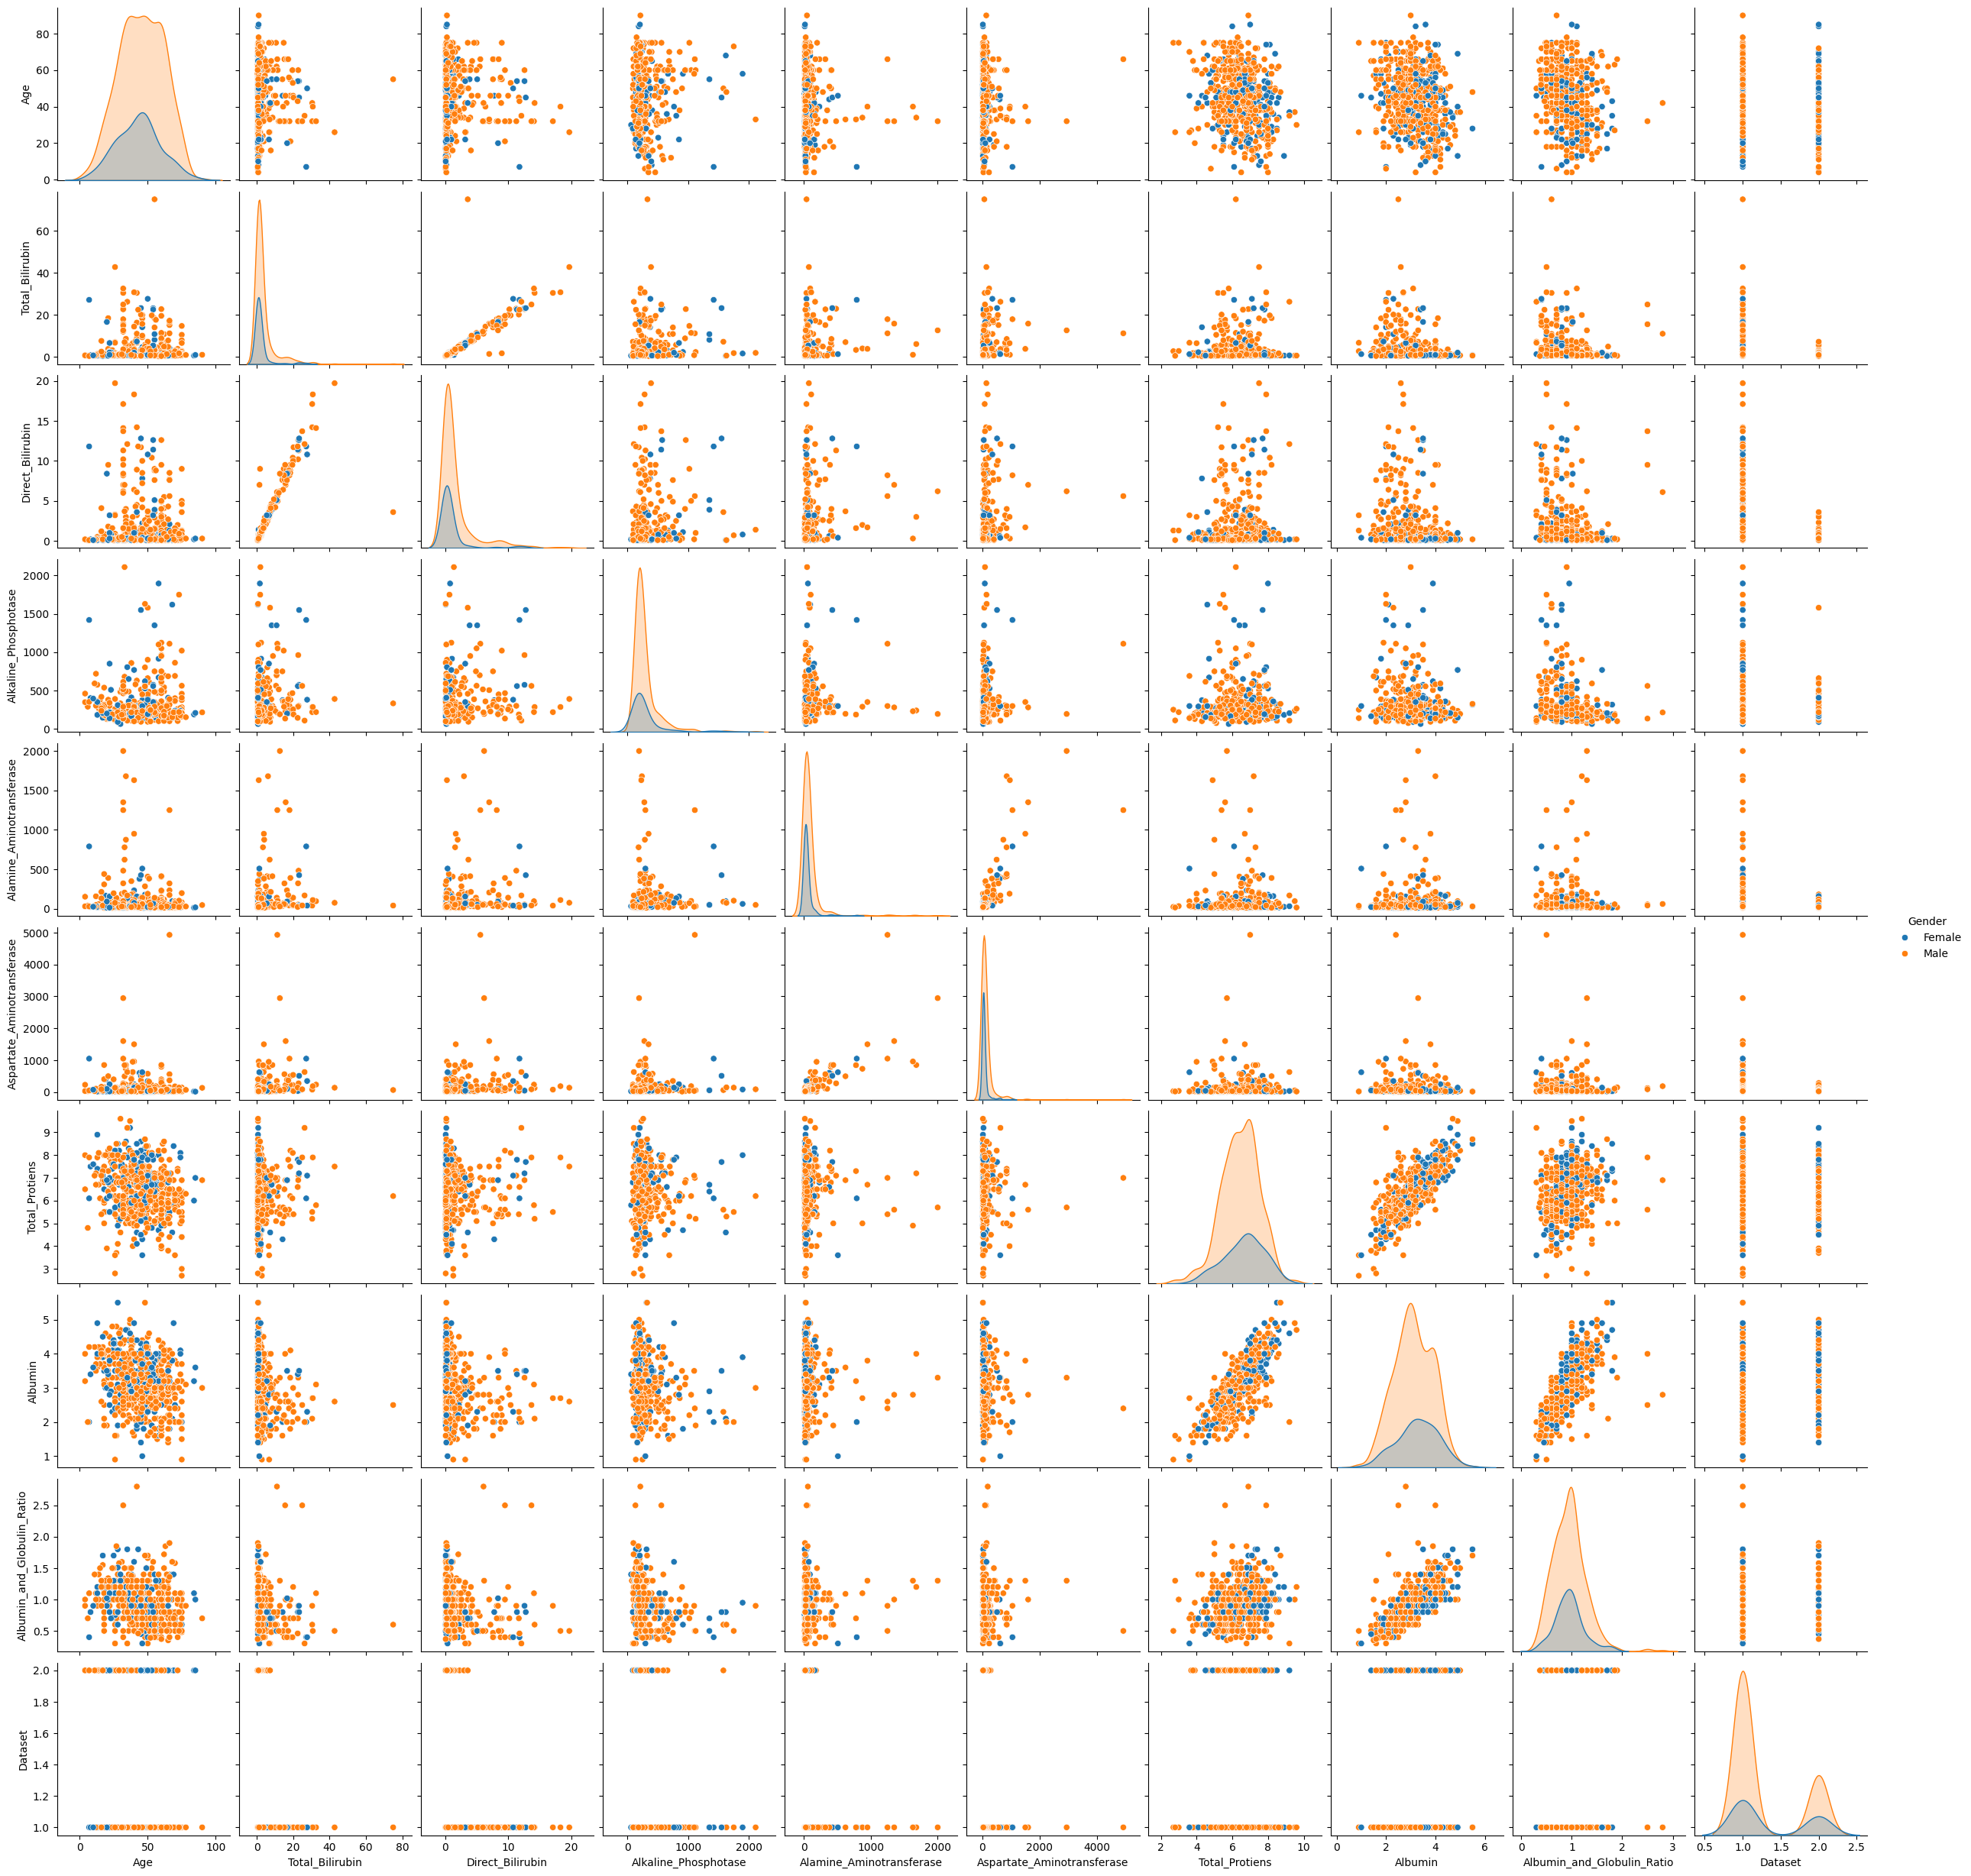

In [ ]:
sns.pairplot(df,hue = 'Gender',diag_kind = 'kde')

CORRELATION

<Axes: >

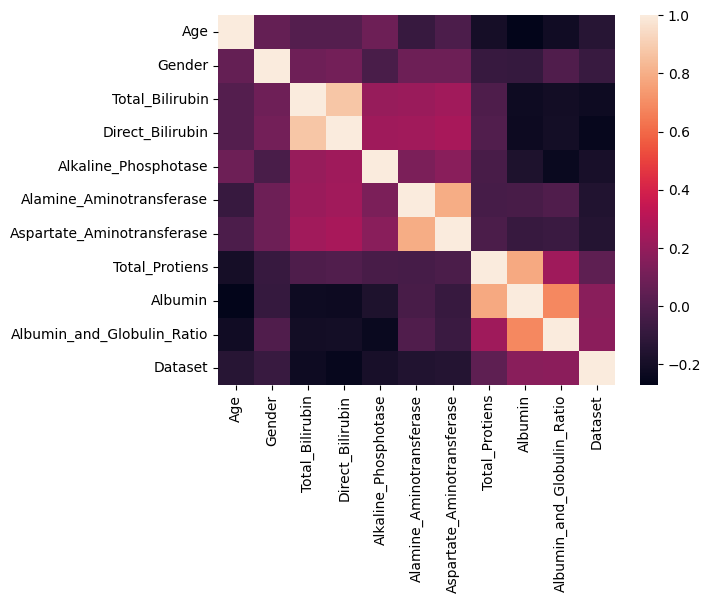

In [ ]:
sns.heatmap(df.corr())

In [10]:
df.corr()['Dataset'].sort_values(ascending = False)

,Dataset
Dataset,1.000000
Albumin_and_Globulin_Ratio,0.171054
Albumin,0.166835
Total_Protiens,0.037794
Gender,-0.078501
Age,-0.138093
Aspartate_Aminotransferase,-0.151101
Alamine_Aminotransferase,-0.161917
Alkaline_Phosphotase,-0.187560
Total_Bilirubin,-0.224430


In [9]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Gender']=df['Gender'].astype('int64')

**SPLITTING THE DATASET**

In [11]:
x = df.iloc[0:400,0:-1]
y = df.iloc[0:400,-1]
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
y.head()

,Dataset
0,1
1,1
2,1
3,1
4,1


In [ ]:
y.value_counts()

,count
Dataset,
1,285
2,115


**BALANCING THE DATASET**

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smote = SMOTETomek(sampling_strategy='auto')
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

Dataset
1    285
2    115
Name: count, dtype: int64
Dataset
1    268
2    268
Name: count, dtype: int64


**SCALING THE DATA**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
names=x.columns
x_bal=pd.DataFrame(x_bal,columns=names)
x_bal.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
x_bal.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
531,65,0,1.192482,0.446241,177,28,34,5.568794,2.284397,0.650752
532,35,0,0.818174,0.200000,196,36,32,7.054523,4.127221,1.390872
533,84,0,0.727193,0.209064,189,13,20,6.090644,3.236258,1.090936
534,20,0,0.715733,0.200000,209,17,24,7.174137,4.005603,1.193707
535,45,1,1.186919,0.354768,204,29,24,6.452323,3.303545,1.046430


In [ ]:
y_bal.head()

,Dataset
0,1
1,1
2,1
3,1
4,1


**TRAINING AND TESTING**

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(x_bal,y_bal,test_size=0.2,random_state=49)


In [ ]:
x_bal.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
531,65,0,1.192482,0.446241,177,28,34,5.568794,2.284397,0.650752
532,35,0,0.818174,0.200000,196,36,32,7.054523,4.127221,1.390872
533,84,0,0.727193,0.209064,189,13,20,6.090644,3.236258,1.090936
534,20,0,0.715733,0.200000,209,17,24,7.174137,4.005603,1.193707
535,45,1,1.186919,0.354768,204,29,24,6.452323,3.303545,1.046430


In [ ]:
y_bal.head()

,Dataset
0,1
1,1
2,1
3,1
4,1


In [ ]:
xtrain.shape

(375, 10)

In [ ]:
xtest.shape

(161, 10)

**MODEL BUILDING**

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

SUPPORT VECTOR MACHINE MODEL

In [17]:
svm = SVC()
RFmodel=RandomForestClassifier()
KNNmodel= KNeighborsClassifier()
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
svm.fit(xtrain,ytrain)

SVC()

In [18]:
SVMPred = svm.predict(xtest)
SVMaccuracy = accuracy_score(ytest, SVMPred)
SVMaccuracy

0.7037037037037037

In [19]:
def svm_model(X_train, X_test, y_train, y_test):
    svm = SVC()
    svm.fit(X_train, y_train)
    SVMpred = svm.predict(X_test)
    SVMaccuracy = accuracy_score(y_test, SVMpred)
    print("SVM Accuracy Score: {}".format(SVMaccuracy))
    print("Classification Report:\n", classification_report(y_test, SVMpred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, SVMpred))
svm_model(xtrain, xtest, ytrain, ytest)

SVM Accuracy Score: 0.7037037037037037
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.45      0.59        51
           2       0.65      0.93      0.77        57

    accuracy                           0.70       108
   macro avg       0.75      0.69      0.68       108
weighted avg       0.75      0.70      0.68       108

Confusion Matrix:
 [[23 28]
 [ 4 53]]


KNN MODEL

In [ ]:
KNNmodel.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
KNNpred = KNNmodel.predict(xtest)
KNNaccuracy = accuracy_score(KNNpred,ytest)
KNNaccuracy

0.75

In [ ]:
def knn(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    KNNpred = knn_model.predict(X_test)
    KNNaccuracy = accuracy_score(y_test, KNNpred)
    print("KNN Accuracy Score: {}".format(KNNaccuracy))
    print("Classification Report:\n", classification_report(y_test, KNNpred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, KNNpred))
knn(xtrain, xtest, ytrain, ytest)

KNN Accuracy Score: 0.75
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.72      0.71        46
           2       0.79      0.77      0.78        62

    accuracy                           0.75       108
   macro avg       0.74      0.75      0.75       108
weighted avg       0.75      0.75      0.75       108

Confusion Matrix:
 [[33 13]
 [14 48]]


RANDOM FOREST MODEL

In [ ]:
RFmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
RFpred=RFmodel.predict(xtest)
RFaccuracy = accuracy_score(RFpred,ytest)
RFaccuracy

0.8796296296296297

In [ ]:
def random_forest(xtrain, xtest, ytrain, ytest):
    rf = RandomForestClassifier()
    rf.fit(xtrain, ytrain)
    RFpred = rf.predict(xtest)
    RFaccuracy = accuracy_score(ytest, RFpred)
    print("Random Forest Accuracy Score: {}".format(RFaccuracy))
    print("Classification Report:\n", classification_report(ytest, RFpred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, RFpred))
random_forest(xtrain, xtest, ytrain, ytest)

Random Forest Accuracy Score: 0.8703703703703703
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.87      0.85        46
           2       0.90      0.87      0.89        62

    accuracy                           0.87       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.87      0.87      0.87       108

Confusion Matrix:
 [[40  6]
 [ 8 54]]


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(xtest)
DTaccuracy = accuracy_score(ytest, dt_pred)
DTaccuracy

0.7592592592592593

In [ ]:
def decision_tree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("Decision Tree Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
decision_tree(xtrain, xtest, ytrain, ytest)

Decision Tree Accuracy Score: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.78      0.75        46
           2       0.83      0.77      0.80        62

    accuracy                           0.78       108
   macro avg       0.77      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108

Confusion Matrix:
 [[36 10]
 [14 48]]


LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
y_pred = log_reg_model.predict(xtest)
log_reg_accuracy = accuracy_score(ytest, y_pred)
log_reg_accuracy

0.7962962962962963

In [ ]:
def logistic_regression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    LRpred = lr.predict(X_test)
    LRaccuracy = accuracy_score(y_test, LRpred)
    print("Logistic Regression Accuracy Score: {}".format(LRaccuracy))
    print("Classification Report:\n", classification_report(y_test, LRpred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, LRpred))
logistic_regression(xtrain, xtest, ytrain, ytest)

Logistic Regression Accuracy Score: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.78      0.77        46
           2       0.83      0.81      0.82        62

    accuracy                           0.80       108
   macro avg       0.79      0.79      0.79       108
weighted avg       0.80      0.80      0.80       108

Confusion Matrix:
 [[36 10]
 [12 50]]


COMPARING THE MODELS

In [22]:
svm = SVC()
dt_model = DecisionTreeClassifier()
RFmodel = RandomForestClassifier()
KNNmodel = KNeighborsClassifier()
log_reg_model = LogisticRegression()
svm.fit(xtrain,ytrain)
dt_model.fit(xtrain,ytrain)
RFmodel.fit(xtrain,ytrain)
KNNmodel.fit(xtrain,ytrain)
log_reg_model.fit(xtrain,ytrain)
pred0=svm.predict(xtrain)
pred1=dt_model.predict(xtrain)
pred2=RFmodel.predict(xtrain)
pred3=KNNmodel.predict(xtrain)
pred4=log_reg_model.predict(xtrain)


In [ ]:
print('SVM:',accuracy_score(ytrain,pred0))
print('Decision Tree:',accuracy_score(ytrain,pred1))
print('Random Forest:',accuracy_score(ytrain,pred2))
print('KNN:',accuracy_score(ytrain,pred3))
print('Logistic:',accuracy_score(ytrain,pred4))

SVM: 0.7546728971962616
Decision Tree: 1.0
Random Forest: 1.0
KNN: 0.7686915887850467
Logistic: 0.677570093457944


In [23]:
y_pred1=svm.predict(xtest)
y_pred2=dt_model.predict(xtest)
y_pred3=RFmodel.predict(xtest)
y_pred4=KNNmodel.predict(xtest)
y_pred5 =log_reg_model.predict(xtest)

In [24]:
print('Support Vector:',accuracy_score(ytest,y_pred1))
print('Decision Tree:',accuracy_score(ytest,y_pred2))
print('Random Forest:',accuracy_score(ytest,y_pred3))
print('KNN:',accuracy_score(ytest,y_pred4))
print('Logistic:',accuracy_score(ytest,y_pred5))

Support Vector: 0.7037037037037037
Decision Tree: 0.6574074074074074
Random Forest: 0.8055555555555556
KNN: 0.7129629629629629
Logistic: 0.75


**HYPERPARAMETER TUNNING**

In [ ]:
def randomForest(xtrain,xtest,ytrain,ytest):
  model = RandomForestClassifier(verbose=2,n_estimators=120,max_features='log2',max_depth=10,criterion='entropy')
  model.fit(xtrain,ytrain)
  y_tr=model.predict(xtrain)
  print("Accuracy Score {}".format(accuracy_score(ytrain,y_tr)))
  y_pr=model.predict(xtest)
  print("Accuracy Score {}".format(accuracy_score(ytest,y_pr)))
randomForest(xtrain,xtest,ytrain,ytest)

building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 79 of 120
building tree 80 of 120
building tree 81 of 120
building tree 82 of 120
building tree 83 of 120
building tree 84 of 120
building tree 85 of 120
building tree 86 of 120
building tree 87 of 120
building tree 88 of 120
building tree 89 of 120
building tree 90 of 120
building tree 91 of 120
building tree 92 of 120
building tree 93 of 120
building tree 94 of 120
building tree 95 of 120
building tree 96 of 120
building tree 97 of 120
building tree 98 of 120
building tree 99 of 120
building tree 100 of 120
building tree 101 of 120
building tree 102 of 120
building tree 103 of 120
building tree 104 of 120
building tree 105 of 120
building tree 106 of 120
building tree 107 of 120
building tree 108 of 120
building tree 109 of 120
building tree 110 of 120
building tree 111 of 120
building tree 112 of 120
building tree 113 of 120
building tree 114 of 120
building tree 115 of 120
building tree 116 of 120
building tree 117 of 120
building tree 118 of 120
building tree 119 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
from sklearn.metrics import f1_score
RFmodel.fit(xtrain,ytrain)
y_pred3 = RFmodel.predict(xtest)
print("Accuracy Score {}".format(accuracy_score(ytest,y_pred3)))
print("f1_Score {}".format(f1_score(y_pred3,ytest,average='weighted')))

Accuracy Score 0.8611111111111112
f1_Score 0.8606398917403703


In [25]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(xtrain, ytrain)

# Best model
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(xtest)

# Evaluation
print("SVM Accuracy: ", accuracy_score(ytest, y_pred_svm))
print("Classification Report:\n", classification_report(ytest, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_svm))


SVM Accuracy:  0.7037037037037037
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.45      0.59        51
           2       0.65      0.93      0.77        57

    accuracy                           0.70       108
   macro avg       0.75      0.69      0.68       108
weighted avg       0.75      0.70      0.68       108

Confusion Matrix:
 [[23 28]
 [ 4 53]]


In [39]:
print(best_svm)


SVC(C=1, gamma='auto')


In [27]:
# Hyperparameter tuning for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(xtrain, ytrain)

# Best model
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(xtest)

# Evaluation
print("Decision Tree Accuracy: ", accuracy_score(ytest, y_pred_dt))
print("Classification Report:\n", classification_report(ytest, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_dt))

Decision Tree Accuracy:  0.7129629629629629
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.67      0.69        51
           2       0.72      0.75      0.74        57

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108

Confusion Matrix:
 [[34 17]
 [14 43]]


In [38]:
print(best_dt)


DecisionTreeClassifier(criterion='entropy', max_depth=30)


In [29]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(xtrain, ytrain)

# Best model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(xtest)

# Evaluation
print("Random Forest Accuracy: ", accuracy_score(ytest, y_pred_rf))
print("Classification Report:\n", classification_report(ytest, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_rf))

Random Forest Accuracy:  0.8148148148148148
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.75      0.79        51
           2       0.79      0.88      0.83        57

    accuracy                           0.81       108
   macro avg       0.82      0.81      0.81       108
weighted avg       0.82      0.81      0.81       108

Confusion Matrix:
 [[38 13]
 [ 7 50]]


In [40]:
print(best_rf)


RandomForestClassifier(max_depth=20, min_samples_split=5)


In [32]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(xtrain, ytrain)

# Best model
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(xtest)

# Evaluation
print("KNN Accuracy: ", accuracy_score(ytest, y_pred_knn))
print("Classification Report:\n", classification_report(ytest, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_knn))

KNN Accuracy:  0.7129629629629629
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.59      0.66        51
           2       0.69      0.82      0.75        57

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108

Confusion Matrix:
 [[30 21]
 [10 47]]


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [41]:
print(best_knn)


KNeighborsClassifier(weights='distance')


In [34]:
# Hyperparameter tuning for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(xtrain, ytrain)

# Best model
best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(xtest)

# Evaluation
print("Logistic Regression Accuracy: ", accuracy_score(ytest, y_pred_lr))
print("Classification Report:\n", classification_report(ytest, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_lr))

Logistic Regression Accuracy:  0.75
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.59      0.69        51
           2       0.71      0.89      0.79        57

    accuracy                           0.75       108
   macro avg       0.77      0.74      0.74       108
weighted avg       0.77      0.75      0.74       108

Confusion Matrix:
 [[30 21]
 [ 6 51]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

In [42]:
print(best_lr)


LogisticRegression(C=10, solver='saga')


**EVALUATING PERFORMANCE OF THE MODEL & SAVING THE MODEL**

In [ ]:
from sklearn.metrics import f1_score
RFmodel.fit(xtrain,ytrain)
y_pred3 = RFmodel.predict(xtest)
print("Accuracy Score {}".format(accuracy_score(ytest,y_pred3)))
print("f1_Score {}".format(f1_score(y_pred3,ytest,average='weighted')))

Accuracy Score 0.8703703703703703
f1_Score 0.870053869705073


In [ ]:
model = RandomForestClassifier(verbose=2,n_estimators=200,max_features='log2',max_depth=None,criterion='entropy')
model.fit(xtrain,ytrain)

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.9s


building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, verbose=2)

In [ ]:
import pickle
pickle.dump(model,open('liver_analysis.pk1','wb'))

In [ ]:
pickle.dump(scaler,open('scaling.pkl','wb'))

**TESTING WITH VALUES**

In [ ]:
input=[[65,1,0.7,0.1,187,16,18,6.8,3.3,0.90]]
input=scaler.transform(input)
prediction = model.predict(input)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


array([2])

In [ ]:
input=[[17,0,0.9,0.3,202,22,19,7.4,4.1,1.2]]
input=scaler.transform(input)
prediction = model.predict(input)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


array([2])

In [ ]:

input=[[33,0,3.4,1.6,186,779,884,7.3,3.2,0.7]]
input=scaler.transform(input)
prediction = model.predict(input)
prediction



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


array([1])

In [ ]:
input=[[26,0,0.6,0.2,120,45,51,7.9,.4,1]]
input=scaler.transform(input)
prediction = RFmodel.predict(input)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])